In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [55]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [56]:
bike.shape

(730, 16)

In [57]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [58]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [59]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [60]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [61]:
bike_new['season']=bike['season'].astype('category')
bike_new['weathersit']=bike['weathersit'].astype('category')
bike_new['mnth']=bike['mnth'].astype('category')
bike_new['weekday']=bike['weekday'].astype('category')

In [62]:
# Encoding/mapping the month column

bike_new.month = bike_new.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [63]:
# Encoding/mapping the weekday column

bike_new.weekday = bike_new.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [64]:
#convert such feature values into categorical string values


bike_new[['weathersit']] = bike_new[['weathersit']].apply(lambda x: x.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'}))

In [65]:
# Encoding/mapping the season column

bike_new[['season']] = bike_new[['season']].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

In [66]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


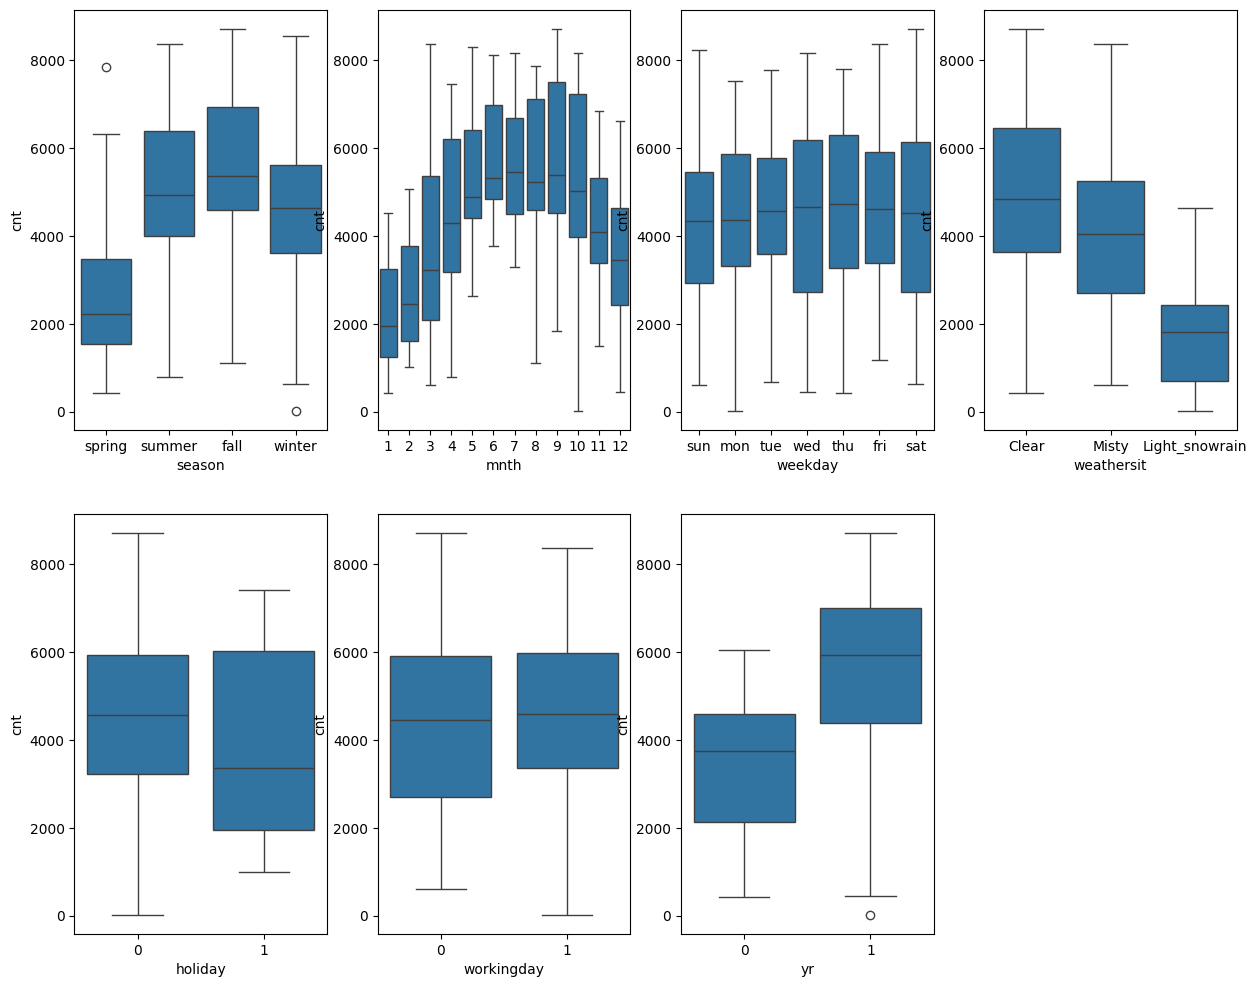

In [67]:
# Analysing the categorical columns
plt.figure(figsize=(15, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_new)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_new)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_new)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_new)
plt.show()

In [68]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bike_new.month,drop_first=True)
weekdays_df=pd.get_dummies(bike_new.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike_new.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike_new.season,drop_first=True)

In [69]:
#concate the dummy var with the origignal one

bike_new = pd.concat([bike_new,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [70]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
0,spring,0,1,0,sat,0,Misty,14.110847,18.18125,80.5833,...,False,False,False,False,True,True,False,False,False,False
1,spring,0,1,0,sun,0,Misty,14.902598,17.68695,69.6087,...,False,False,False,False,False,True,False,False,False,False
2,spring,0,1,0,mon,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,False,False,False,False,False,False
3,spring,0,1,0,tue,1,Clear,8.200000,10.60610,59.0435,...,True,False,False,False,False,False,False,False,False,False
4,spring,0,1,0,wed,1,Clear,9.305237,11.46350,43.6957,...,False,True,False,False,False,False,False,False,False,False


In [71]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   season          730 non-null    category
 1   yr              730 non-null    int64   
 2   mnth            730 non-null    category
 3   holiday         730 non-null    int64   
 4   weekday         730 non-null    category
 5   workingday      730 non-null    int64   
 6   weathersit      730 non-null    category
 7   temp            730 non-null    float64 
 8   atemp           730 non-null    float64 
 9   hum             730 non-null    float64 
 10  windspeed       730 non-null    float64 
 11  cnt             730 non-null    int64   
 12  feb             730 non-null    bool    
 13  mar             730 non-null    bool    
 14  apr             730 non-null    bool    
 15  may             730 non-null    bool    
 16  june            730 non-null    bool    
 17  july            

In [72]:
# dropping unnecessary columns

bike_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [73]:
variable=['feb','mar','apr','may','june','july','aug','sep','oct','nov','dec','mon','tue','wed','thu','fri','sat','Misty','Light_snowrain','summer','fall','winter']

bike_new[variable]=bike_new[variable].apply(lambda x: x.map({False:0,True:1}))

In [74]:
#splitting the dataframe into Train and Test
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 100)

In [75]:
scaler = MinMaxScaler()

In [76]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,feb,mar,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,1,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,1,...,0,0,0,0,1,1,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,0,0,0,1,1,0,1,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,1,0,1,0,1,0,0


In [77]:
# Apply scaler() to all the columns

num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

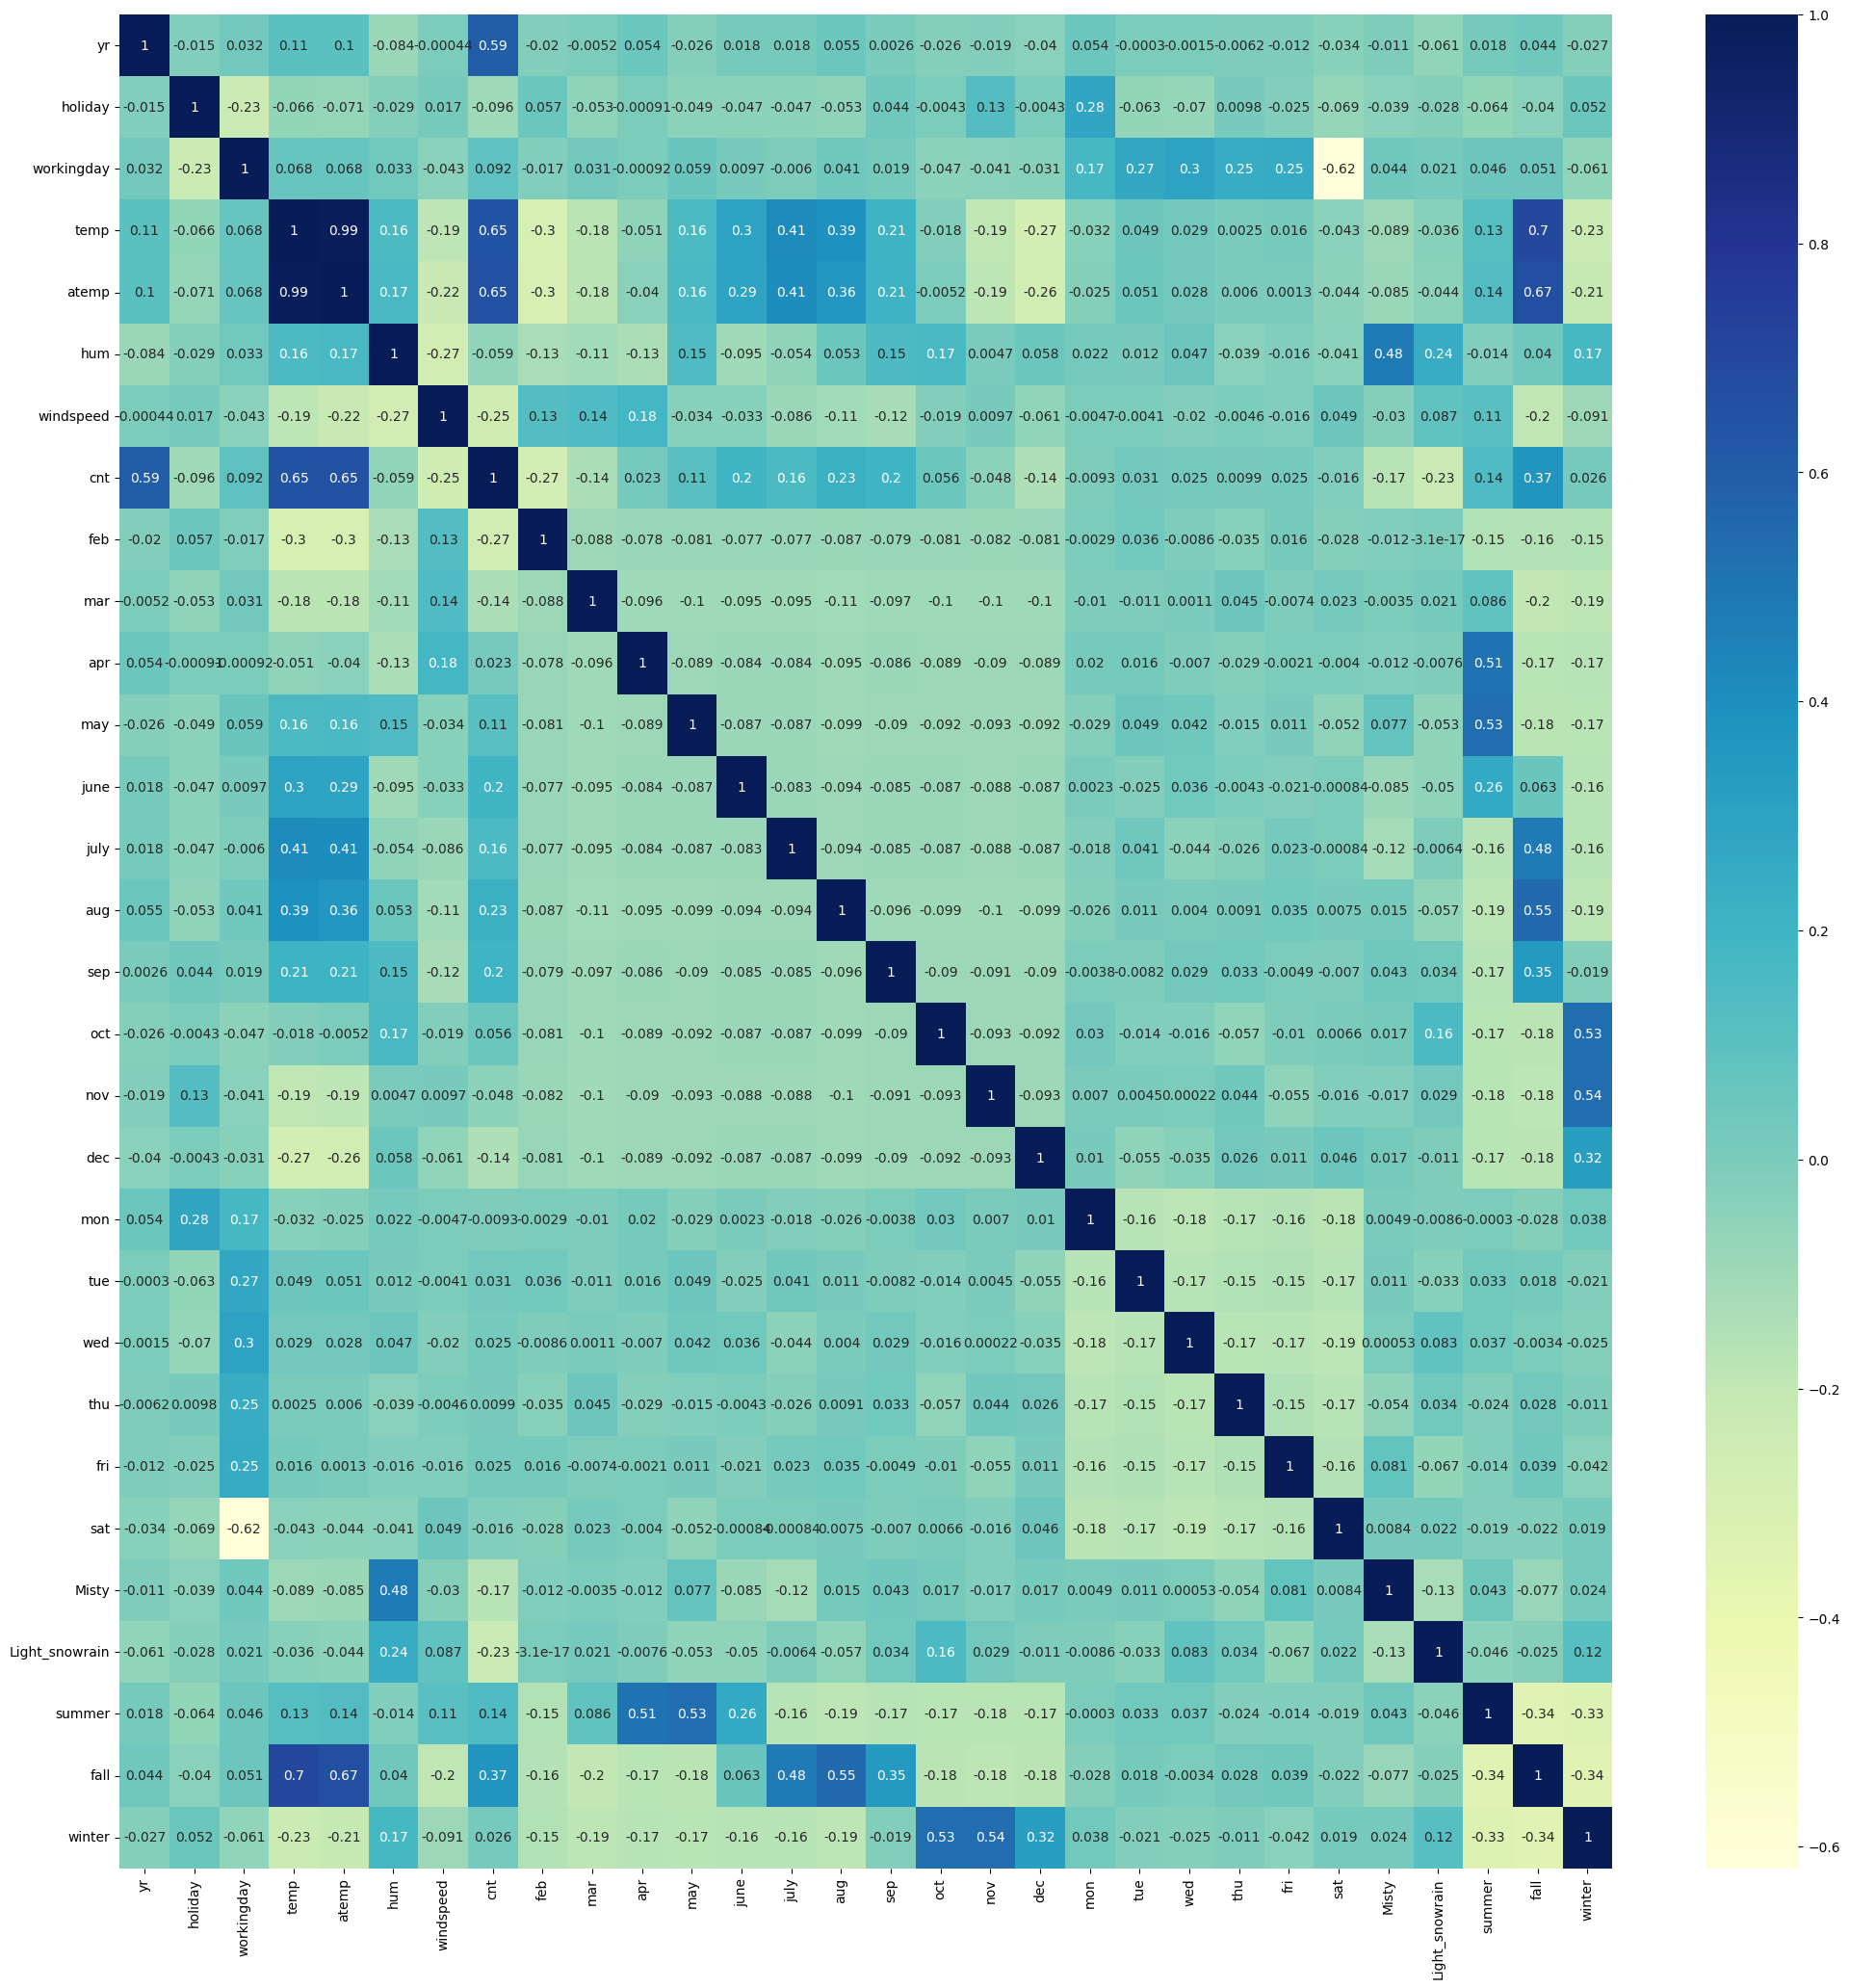

In [78]:
# heat map
plt.figure(figsize=(25,25))
sns.heatmap(bike_train.corr(),annot=True, cmap='YlGnBu')
plt.show()

cnt have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation

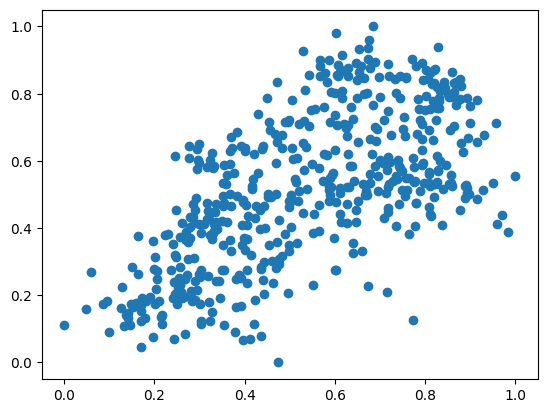

In [79]:
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

Shows a positive correlation

In [80]:
# Building the Model

y_train = bike_train.pop('cnt')
X_train = bike_train

In [81]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,feb,mar,apr,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,1,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,1,0,...,0,0,0,0,1,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,1,...,0,0,0,0,1,1,0,1,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,1,...,0,0,0,1,0,1,0,1,0,0


In [82]:
y_train.head()

,cnt
576,0.827658
426,0.465255
728,0.204096
482,0.482973
111,0.191095


In [83]:
# Recursive feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [84]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'aug', 'sep',
       'oct', 'sat', 'Misty', 'Light_snowrain', 'summer', 'fall', 'winter'],
      dtype='object')


In [85]:
X_train_rfe = X_train[col]

In [86]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.07
4,hum,17.44
13,fall,8.19
2,workingday,5.05
5,windspeed,3.88
12,summer,3.46
14,winter,2.85
10,Misty,2.15
0,yr,2.04
9,sat,1.91


In [87]:
X_train_sm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train,X_train_sm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.81e-180
Time:                        10:25:44   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1758      0.030      5.

In [88]:
# As temp shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['temp'], axis = 1)

#Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,12.18
2,workingday,5.01
4,windspeed,3.83
12,fall,3.41
13,winter,2.67
11,summer,2.05
9,Misty,1.99
0,yr,1.98
8,sat,1.90
5,aug,1.85


In [89]:
# As humidity shows high VIF values hence we can drop it
X_train_new1 = X_train_new.drop(['hum'], axis = 1)

#Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,3.88
3,windspeed,3.43
11,fall,2.96
12,winter,2.24
0,yr,1.94
4,aug,1.85
10,summer,1.77
7,sat,1.67
6,oct,1.56
8,Misty,1.55


In [90]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new1)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.81e-154
Time:                        10:25:45   Log-Likelihood:                 425.30
No. Observations:                 510   AIC:                            -822.6
Df Residuals:                     496   BIC:                            -763.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2431      0.019     12.

In [91]:
# We can drop holiday variable as it has high p-value
X_train_new1 = X_train_new1.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,3.65
2,windspeed,3.28
10,fall,2.94
11,winter,2.20
0,yr,1.94
3,aug,1.85
9,summer,1.77
6,sat,1.61
5,oct,1.56
7,Misty,1.55


In [92]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new1)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.69e-154
Time:                        10:25:45   Log-Likelihood:                 423.93
No. Observations:                 510   AIC:                            -821.9
Df Residuals:                     497   BIC:                            -766.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2346      0.019     12.

In [93]:
# We can drop aug variable as it has high p-value
X_train_new1 = X_train_new1.drop(['aug'], axis = 1)

# Run the function to calculate VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,3.65
2,windspeed,3.27
10,winter,2.20
9,fall,1.96
0,yr,1.94
8,summer,1.77
5,sat,1.61
4,oct,1.56
6,Misty,1.54
3,sep,1.28


In [94]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new1)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     158.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.49e-154
Time:                        10:25:45   Log-Likelihood:                 421.90
No. Observations:                 510   AIC:                            -819.8
Df Residuals:                     498   BIC:                            -769.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2331      0.019     12.

In [95]:
# Checking the parameters and their coefficient values
lr_4.params

,0
const,0.233079
yr,0.247835
workingday,0.058256
windspeed,-0.174954
sep,0.081798
oct,0.095988
sat,0.065850
Misty,-0.092197
Light_snowrain,-0.316200
summer,0.256484


In [96]:
X_train_lm_4

,const,yr,workingday,windspeed,sep,oct,sat,Misty,Light_snowrain,summer,fall,winter
576,1.0,1,1,0.264686,0,0,0,0,0,0,1,0
426,1.0,1,0,0.255342,0,0,1,1,0,0,0,0
728,1.0,1,0,0.663106,0,0,0,0,0,0,0,0
482,1.0,1,0,0.188475,0,0,1,1,0,1,0,0
111,1.0,0,1,0.380981,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.187140,0,0,0,0,0,0,1,0
53,1.0,0,1,0.111379,0,0,0,0,0,0,0,0
350,1.0,0,0,0.431816,0,0,1,1,0,0,0,1
79,1.0,0,1,0.529881,0,0,0,1,0,1,0,0


In [97]:
y_train_pred = lr_4.predict(X_train_lm_4)

Text(0.5, 0, 'Errors')

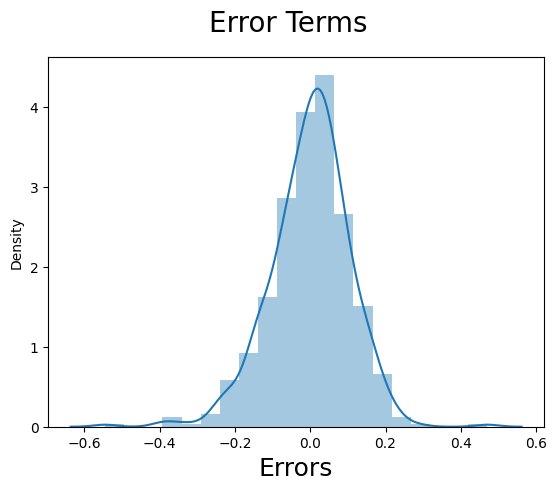

In [98]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

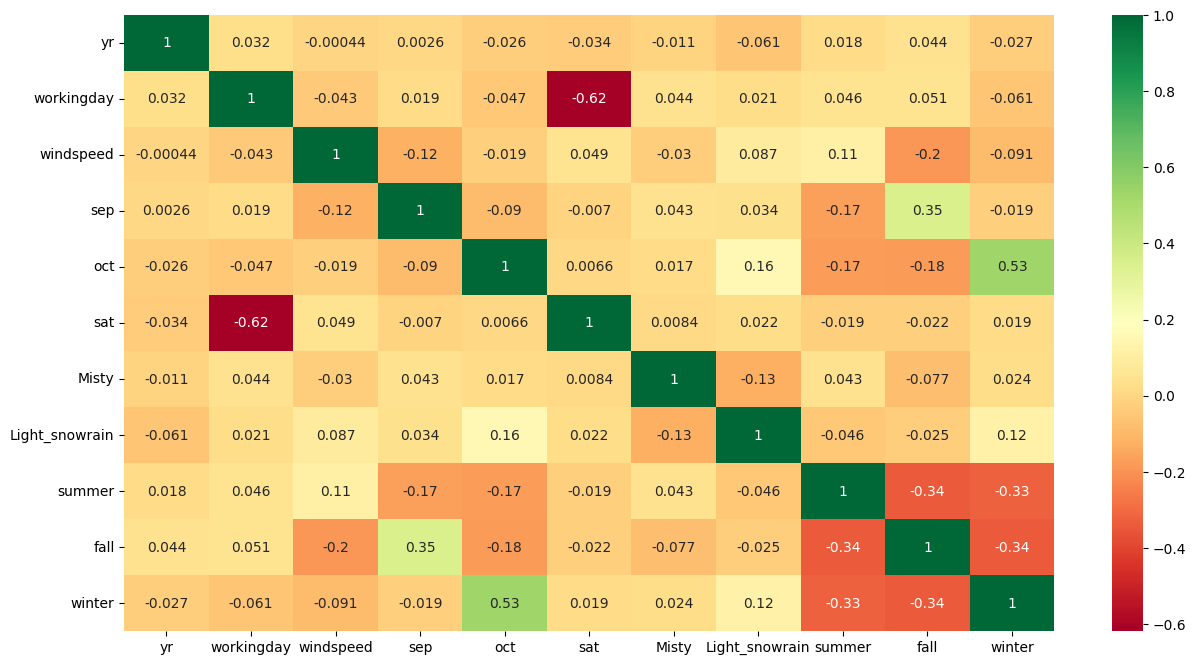

In [99]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new1.corr(),annot = True, cmap="RdYlGn")
plt.show()

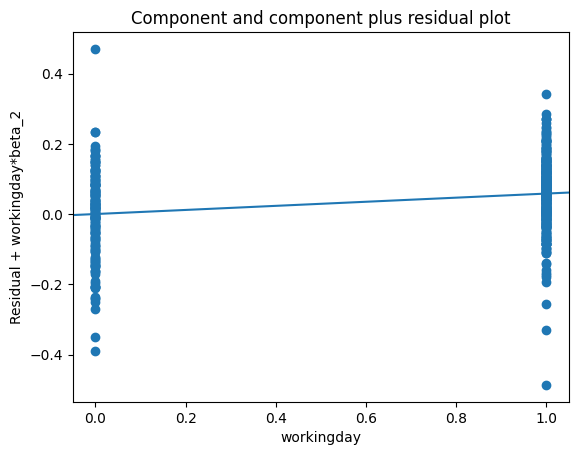

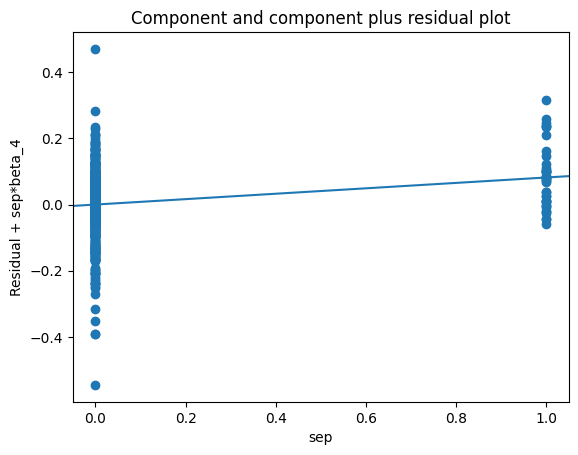

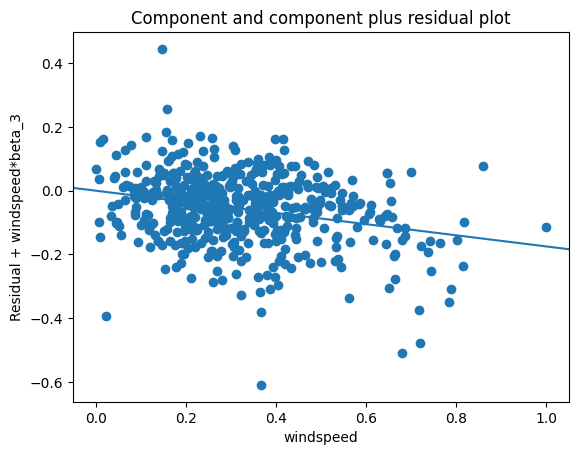

In [100]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_4, 'workingday')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'windspeed')
plt.show()

In [101]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,feb,mar,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,1,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,1,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,1,0,0,0,0,0,0,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,1,0,0


In [102]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [103]:
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,feb,mar,apr,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,1,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,0,...,0,1,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,0,...,0,0,1,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,1,0,0,0,0,0,0,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0,0,0,...,1,0,0,0,0,0,0,0,0,1
127,0,0,0,0.584649,0.577380,0.650923,0.069510,0,0,0,...,0,0,0,0,0,0,0,1,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0,0,0,...,0,1,0,0,0,1,0,0,0,1
72,0,0,1,0.331557,0.332005,0.512107,0.203418,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
col1 = X_train_new1.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)

In [105]:
X_test

,yr,workingday,windspeed,sep,oct,sat,Misty,Light_snowrain,summer,fall,winter
184,0,0,0.084219,0,0,0,1,0,0,1,0
535,1,1,0.153728,0,0,0,0,0,1,0,0
299,0,1,0.334206,0,1,0,1,0,0,0,1
221,0,1,0.339570,0,0,0,0,0,0,1,0
152,0,1,0.537414,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1,1,0.283397,0,0,0,0,0,0,0,1
127,0,0,0.069510,0,0,0,0,0,1,0,0
640,1,1,0.052115,0,1,0,1,0,0,0,1
72,0,1,0.203418,0,0,0,0,0,0,0,0


In [106]:
X_train_new1

,yr,workingday,windspeed,sep,oct,sat,Misty,Light_snowrain,summer,fall,winter
576,1,1,0.264686,0,0,0,0,0,0,1,0
426,1,0,0.255342,0,0,1,1,0,0,0,0
728,1,0,0.663106,0,0,0,0,0,0,0,0
482,1,0,0.188475,0,0,1,1,0,1,0,0
111,0,1,0.380981,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1,1,0.187140,0,0,0,0,0,0,1,0
53,0,1,0.111379,0,0,0,0,0,0,0,0
350,0,0,0.431816,0,0,1,1,0,0,0,1
79,0,1,0.529881,0,0,0,1,0,1,0,0


In [107]:
y_pred = lr_4.predict(X_test_lm_4)

In [108]:
r2 = r2_score(y_test, y_pred)
round(r2,5)

0.77345

Text(0, 0.5, 'y_pred')

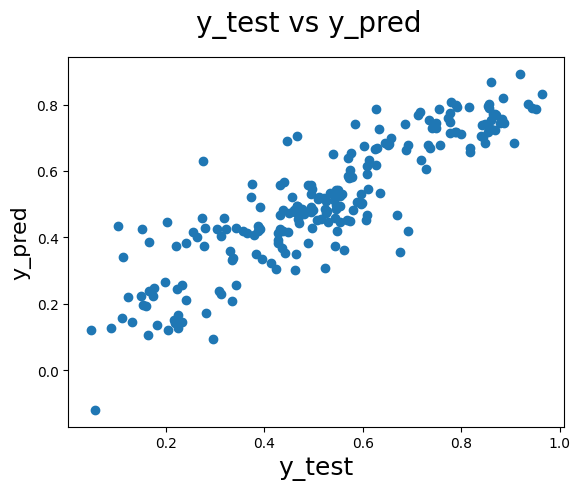

In [109]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [110]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7615


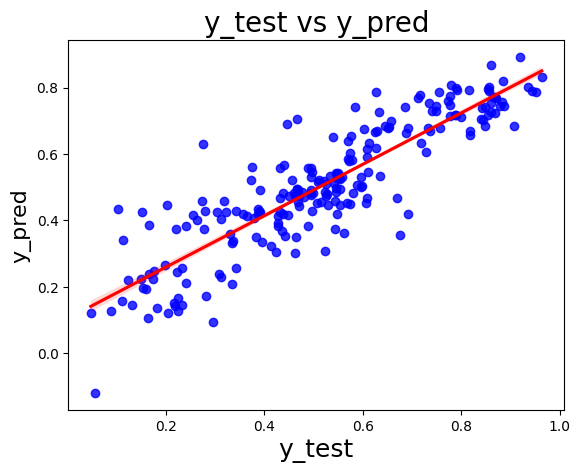

In [111]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()